# CS210 Term Project - Airbnb Istanbul

* Senih Berkay Akın - 26589
* Osman Arslan - 29127
* Ilgın Simay Özcan - 31099
* Deniz Gürleyen- 30919
* Zeynep Kılıçarslan - 28859
* Damla Aydın - 30825

## Introduction

This project explores a database from Kaggle, based on Airbnb. It is selected to analyze the prices of the properties in Istanbul. By exploring the dataset, our goal is to reveal what factors are driving pricing trends. The insights gained from data analysis will enable decision-making for both hosts and guests, contributing to a comprehensive understanding of the Airbnb market in Istanbul. 

## Data Exploration

The primary variables influencing Airbnb costs are location, facilities,  and type of house/room. Particularly, it is postulated that location has the most influence on Airbnb costs and that flats closer to the town center would cost more since the cost of an Airbnb may also be affected by outside variables including distance from restaurants, tourist sites, and public transit. 

<b>In this project, we will examine data and answer the questions below, exploring further areas with deeper analysis. </b>

* What factors influence Airbnb costs, such as the type of house/room?
* What are the trends in Airbnb pricing, and what variables influence them?
* What influence does location have on Airbnb prices? For instance, is an apartment in the city center, more expensive than an apartment in a more remote area?
* How do other factors such as opportunities, crime rates, etc. affect Airbnb prices?

In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import geopandas as gpd

## Data Preparation

In [3]:
df_listing=pd.read_csv('listings.csv')

In [4]:
df_listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,25436,In the forest Sea view Two minutes to the city.,105823,Yesim,NaN,Besiktas,41.07883,29.03863,Entire home/apt,2085,25,0,NaN,NaN,1,348,0,NaN
1,27271,Lovely apartment in perfect location,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,1044,10,4,2022-11-01,0.04,1,266,1,NaN
2,304011,Beyoglu / Central with Beautiful View,1564870,Living,NaN,Beyoglu,41.03537,28.97316,Entire home/apt,1118,28,28,2023-03-18,0.26,2,240,7,NaN
3,304029,Zero km to City Center -- Friendly,1564916,Esen,NaN,Sisli,41.05156,28.99052,Private room,384,2,36,2023-01-05,0.27,1,94,1,NaN
4,28277,Duplex Apartment 11 with Terrace,121607,Alen Ziya,NaN,Sisli,41.04672,28.98402,Entire home/apt,1857,10,8,2022-11-26,0.35,20,361,6,NaN


In [5]:
df_reviews=pd.read_csv('reviews.csv')

In [6]:
df_reviews.head()

,listing_id,date
0,304011,2014-05-12
1,304029,2012-05-07
2,304029,2012-05-18
3,304029,2012-07-01
4,304029,2012-07-26


In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416940 entries, 0 to 416939
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  416940 non-null  int64 
 1   date        416940 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
df_geo = gpd.read_file("neighbourhoods.geojson")

In [9]:
df_geo.head()

,neighbourhood,neighbourhood_group,geometry
0,Sile,NaN,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41..."
1,Catalca,NaN,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41..."
2,Eyup,NaN,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41..."
3,Sariyer,NaN,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41..."
4,Arnavutkoy,NaN,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41..."


In [10]:
print(list(df_listing.columns))

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']


* Since the "name" column in our data is entirely user-dependent and we couldn't review it, we should delete it.

* The "host_name" column contains the host's name, which is not necessary for our analysis, so we can delete it.

* It seems like there is no data in the "neighbourhood_group" column, so we can delete it.
 
* The dtype of "last_review" is not datetime but object, so we should fix that.

* It appears that "last_review" and "reviews_per_month" have NaN values, so we should investigate them.

* It seems like there is no data in the "license" column, so we can delete it.

In [11]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41501 entries, 0 to 41500
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              41501 non-null  int64  
 1   name                            41476 non-null  object 
 2   host_id                         41501 non-null  int64  
 3   host_name                       41501 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   41501 non-null  object 
 6   latitude                        41501 non-null  float64
 7   longitude                       41501 non-null  float64
 8   room_type                       41501 non-null  object 
 9   price                           41501 non-null  int64  
 10  minimum_nights                  41501 non-null  int64  
 11  number_of_reviews               41501 non-null  int64  
 12  last_review                     

In [12]:
for column in df_listing.columns:
    print(df_listing[column].value_counts())

25436                 1
733818371934135883    1
733778034538695853    1
733780047521640409    1
733795206374115522    1
                     ..
52954910              1
53027117              1
52864734              1
53028834              1
857756437907689464    1
Name: id, Length: 41501, dtype: int64
Classy, quality furnished residence-7/24 security     39
airport - city center service                         35
!!!ONLY FEMALES!! SINGLE ROOM AT LADIES DORMITORY     19
Özel oda                                              19
.                                                     15
                                                      ..
2+1 GREAT LOCATION IN SIRINEVLER                       1
retro designe apartment                                1
Huzurlu ve konforlu                                    1
Beautiful apartment with fantastic Bosphorus view.     1
36. Kat, Geniş Balkonlu, 4 kişilik, Lüks 2+1           1
Name: name, Length: 39895, dtype: int64
223450420    279
463019242    1

Columns without NaN values

In [13]:
nulls = df_listing.isna().sum()
nulls[nulls == 0]

id                                0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

We will calculate the ratio of missing values in the columns that contain NaN values to the total number of values in those columns.

In [14]:
def missing_value_percent():
    
    percent_missing = df_listing.isnull().sum() * 100 / len(df_listing)
    missing_value_df = pd.DataFrame({'column_name': df_listing.columns,
                                     'percent_missing': percent_missing})

    return missing_value_df



missing_value_df = missing_value_percent()

# print(missing_value_df[missing_value_df.loc[:,"percent_missing"] >= 50])
print(missing_value_df)

                                                   column_name  \
id                                                          id   
name                                                      name   
host_id                                                host_id   
host_name                                            host_name   
neighbourhood_group                        neighbourhood_group   
neighbourhood                                    neighbourhood   
latitude                                              latitude   
longitude                                            longitude   
room_type                                            room_type   
price                                                    price   
minimum_nights                                  minimum_nights   
number_of_reviews                            number_of_reviews   
last_review                                        last_review   
reviews_per_month                            reviews_per_month   
calculated

As we anticipated, the "neighbourhood_group" and "license" columns have a missing value ratio of 100%. We will delete the columns with missing values exceeding 50%.

In [15]:
missing_colname_per50 = missing_value_df[missing_value_df.loc[:,"percent_missing"] >= 50]["column_name"]

df_listing_droped = df_listing.drop(missing_colname_per50, axis=1)

In [16]:
df_listing_droped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41501 entries, 0 to 41500
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              41501 non-null  int64  
 1   name                            41476 non-null  object 
 2   host_id                         41501 non-null  int64  
 3   host_name                       41501 non-null  object 
 4   neighbourhood                   41501 non-null  object 
 5   latitude                        41501 non-null  float64
 6   longitude                       41501 non-null  float64
 7   room_type                       41501 non-null  object 
 8   price                           41501 non-null  int64  
 9   minimum_nights                  41501 non-null  int64  
 10  number_of_reviews               41501 non-null  int64  
 11  last_review                     23964 non-null  object 
 12  reviews_per_month               

We are dropping the "host_name" and "name" columns for the reasons mentioned earlier.

In [17]:
df_listing_droped = df_listing_droped.drop(["host_name", "name"], axis=1)

In [18]:
df_listing_droped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41501 entries, 0 to 41500
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              41501 non-null  int64  
 1   host_id                         41501 non-null  int64  
 2   neighbourhood                   41501 non-null  object 
 3   latitude                        41501 non-null  float64
 4   longitude                       41501 non-null  float64
 5   room_type                       41501 non-null  object 
 6   price                           41501 non-null  int64  
 7   minimum_nights                  41501 non-null  int64  
 8   number_of_reviews               41501 non-null  int64  
 9   last_review                     23964 non-null  object 
 10  reviews_per_month               23964 non-null  float64
 11  calculated_host_listings_count  41501 non-null  int64  
 12  availability_365                

In [19]:
df_listing_droped.isnull().sum()

id                                    0
host_id                               0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       17537
reviews_per_month                 17537
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

In [20]:
df_listing_droped["last_review"]

0               NaN
1        2022-11-01
2        2023-03-18
3        2023-01-05
4        2022-11-26
            ...    
41496           NaN
41497           NaN
41498           NaN
41499           NaN
41500           NaN
Name: last_review, Length: 41501, dtype: object

We have fixed the "last_review" column to be in datetime format since it was not originally in datetime format.

In [21]:
df_listing_droped["last_review"] = pd.to_datetime(df_listing_droped['last_review'])

In [22]:
df_listing_droped["last_review"]

0              NaT
1       2022-11-01
2       2023-03-18
3       2023-01-05
4       2022-11-26
           ...    
41496          NaT
41497          NaT
41498          NaT
41499          NaT
41500          NaT
Name: last_review, Length: 41501, dtype: datetime64[ns]

In [23]:
df_listing_droped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41501 entries, 0 to 41500
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              41501 non-null  int64         
 1   host_id                         41501 non-null  int64         
 2   neighbourhood                   41501 non-null  object        
 3   latitude                        41501 non-null  float64       
 4   longitude                       41501 non-null  float64       
 5   room_type                       41501 non-null  object        
 6   price                           41501 non-null  int64         
 7   minimum_nights                  41501 non-null  int64         
 8   number_of_reviews               41501 non-null  int64         
 9   last_review                     23964 non-null  datetime64[ns]
 10  reviews_per_month               23964 non-null  float64       
 11  ca

In [24]:
df_listing_droped["reviews_per_month"]

0         NaN
1        0.04
2        0.26
3        0.27
4        0.35
         ... 
41496     NaN
41497     NaN
41498     NaN
41499     NaN
41500     NaN
Name: reviews_per_month, Length: 41501, dtype: float64

In [25]:
df_listing_droped.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,25436,105823,Besiktas,41.07883,29.03863,Entire home/apt,2085,25,0,NaT,NaN,1,348,0
1,27271,117026,Beyoglu,41.03254,28.98153,Entire home/apt,1044,10,4,2022-11-01,0.04,1,266,1
2,304011,1564870,Beyoglu,41.03537,28.97316,Entire home/apt,1118,28,28,2023-03-18,0.26,2,240,7
3,304029,1564916,Sisli,41.05156,28.99052,Private room,384,2,36,2023-01-05,0.27,1,94,1
4,28277,121607,Sisli,41.04672,28.98402,Entire home/apt,1857,10,8,2022-11-26,0.35,20,361,6


We have replaced the NaN values with 0.

In [26]:
df_listing_droped["last_review"].fillna(0, inplace = True)
df_listing_droped["reviews_per_month"].fillna(0, inplace = True)

In [27]:
df_listing_droped.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,25436,105823,Besiktas,41.07883,29.03863,Entire home/apt,2085,25,0,0,0.00,1,348,0
1,27271,117026,Beyoglu,41.03254,28.98153,Entire home/apt,1044,10,4,2022-11-01 00:00:00,0.04,1,266,1
2,304011,1564870,Beyoglu,41.03537,28.97316,Entire home/apt,1118,28,28,2023-03-18 00:00:00,0.26,2,240,7
3,304029,1564916,Sisli,41.05156,28.99052,Private room,384,2,36,2023-01-05 00:00:00,0.27,1,94,1
4,28277,121607,Sisli,41.04672,28.98402,Entire home/apt,1857,10,8,2022-11-26 00:00:00,0.35,20,361,6


In [28]:
df_listing_droped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41501 entries, 0 to 41500
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              41501 non-null  int64  
 1   host_id                         41501 non-null  int64  
 2   neighbourhood                   41501 non-null  object 
 3   latitude                        41501 non-null  float64
 4   longitude                       41501 non-null  float64
 5   room_type                       41501 non-null  object 
 6   price                           41501 non-null  int64  
 7   minimum_nights                  41501 non-null  int64  
 8   number_of_reviews               41501 non-null  int64  
 9   last_review                     41501 non-null  object 
 10  reviews_per_month               41501 non-null  float64
 11  calculated_host_listings_count  41501 non-null  int64  
 12  availability_365                

In [29]:
nulls2 = df_listing_droped.isna().sum()
nulls2[nulls2 != 0]

Series([], dtype: int64)

In [30]:
nulls2[nulls2 == 0]

id                                0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [31]:
df_listing_droped["price"]

0        2085
1        1044
2        1118
3         384
4        1857
         ... 
41496     451
41497     360
41498     750
41499    3000
41500    5217
Name: price, Length: 41501, dtype: int64

In [32]:
df_listing_droped.tail()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
41496,857750180307343247,74937543,Maltepe,40.97079,29.126520,Entire home/apt,451,1,0,0,0.0,2,365,0
41497,857752974052553426,152060683,Kadikoy,40.98556,29.022270,Private room,360,1,0,0,0.0,1,364,0
41498,857754590716964164,507591191,Atasehir,40.97834,29.136950,Private room,750,1,0,0,0.0,2,364,0
41499,857754742404389634,506713106,Beylikduzu,40.97257,28.658970,Entire home/apt,3000,1,0,0,0.0,1,356,0
41500,857756437907689464,420932199,Sisli,41.11833,29.008904,Entire home/apt,5217,3,0,0,0.0,43,193,0


In [33]:
df_listing_droped["neighbourhood"].unique()

array(['Besiktas', 'Beyoglu', 'Sisli', 'Sariyer', 'Fatih', 'Uskudar',
       'Kadikoy', 'Kagithane', 'Basaksehir', 'Bagcilar', 'Maltepe',
       'Esenyurt', 'Beykoz', 'Cekmekoy', 'Sancaktepe', 'Atasehir',
       'Tuzla', 'Pendik', 'Bahcelievler', 'Kartal', 'Beylikduzu',
       'Bakirkoy', 'Adalar', 'Gaziosmanpasa', 'Zeytinburnu',
       'Kucukcekmece', 'Umraniye', 'Eyup', 'Gungoren', 'Avcilar', 'Sile',
       'Arnavutkoy', 'Buyukcekmece', 'Bayrampasa', 'Catalca', 'Esenler',
       'Silivri', 'Sultangazi', 'Sultanbeyli'], dtype=object)

We would like to add a new column to our data indicating whether the Airbnb property is located on the European side or the Asian side. We believe that the side on which the Airbnb is situated is a significant parameter in predicting its price.

In [34]:
europe_side = ['Besiktas', 'Beyoglu', 'Sisli', 'Sariyer', 
               'Fatih', 'Kagithane', 'Basaksehir', 'Bagcilar', 
               'Esenyurt', 'Bahcelievler', 'Beylikduzu',
               'Bakirkoy', 'Gaziosmanpasa', 'Zeytinburnu',
               'Kucukcekmece', 'Eyup', 'Gungoren', 'Avcilar',
               'Arnavutkoy', 'Buyukcekmece', 'Bayrampasa', 'Catalca', 'Esenler',
               'Silivri']
asian_side = ['Uskudar', 'Kadikoy', 'Maltepe', 'Beykoz', 
              'Cekmekoy', 'Sancaktepe', 'Atasehir', 
              'Tuzla', 'Pendik', 'Kartal','Adalar', 
              'Umraniye', 'Sile','Sultanbeyli']

In [35]:
def add_side(dataframe):

    for ds in europe_side:
        dataframe.loc[(dataframe["neighbourhood"] == ds),"Side"] = "European"

    for ds in asian_side:
        dataframe.loc[(dataframe["neighbourhood"] == ds),"Side"] = "Asian"
        
    return dataframe

df_listing_droped = add_side(df_listing_droped)

In [36]:
df_listing_droped[["neighbourhood", "Side"]]

,neighbourhood,Side
0,Besiktas,European
1,Beyoglu,European
2,Beyoglu,European
3,Sisli,European
4,Sisli,European
...,...,...
41496,Maltepe,Asian
41497,Kadikoy,Asian
41498,Atasehir,Asian
41499,Beylikduzu,European


We believed that the presence of a metro in the district where the house is located could be one of the parameters that could affect the price. Therefore, we wanted to add information about whether there is a metro or not to our dataset. We planned to utilize the dataset provided by Istanbul Metropolitan Municipality (IBB) that includes the districts where metro lines pass through.

In [37]:
df_metro_stations = pd.read_csv("metro_stations.csv")

In [38]:
metro_list = df_metro_stations["Konum"].unique()

In [39]:
metro_list = [i for i in metro_list if '&' not in i]

In [40]:
from unidecode import unidecode

We converted the district names in the dataset to English characters to match them with the districts in our main dataset. This was necessary because the district names in the dataset were in Turkish characters.

In [41]:
metro_list = [unidecode(j) for j in metro_list]

In [42]:
print(metro_list)

['Kadikoy', 'Fatih', 'Eyupsultan', 'Umraniye', 'Uskudar', 'Bakirkoy', 'Sariyer', 'Bagcilar', 'Kucukcekmece', 'Bahcelievler', 'Basaksehir', 'Maltepe', 'Kagithane', 'Cekmekoy', 'Gungoren', 'Esenler', 'Besiktas', 'Pendik', 'Sisli', 'Gaziosmanpasa', 'BeyogluFatih', 'Kartal', 'Atasehir', 'Arnavutkoy', 'Bayrampasa', 'Beyoglu']


In [43]:
def add_metro(dataframe):

    for ds in metro_list:
        dataframe.loc[(dataframe["neighbourhood"] == ds),"Metro"] = "Yes"

    dataframe["Metro"] = dataframe["Metro"].fillna("No")
    
    return dataframe


df_listing_droped = add_metro(df_listing_droped)

In [44]:
df_listing_droped[["neighbourhood", "Metro"]]

,neighbourhood,Metro
0,Besiktas,Yes
1,Beyoglu,Yes
2,Beyoglu,Yes
3,Sisli,Yes
4,Sisli,Yes
...,...,...
41496,Maltepe,Yes
41497,Kadikoy,Yes
41498,Atasehir,Yes
41499,Beylikduzu,No


In [45]:
df_listing_droped.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Side,Metro
0,25436,105823,Besiktas,41.07883,29.03863,Entire home/apt,2085,25,0,0,0.00,1,348,0,European,Yes
1,27271,117026,Beyoglu,41.03254,28.98153,Entire home/apt,1044,10,4,2022-11-01 00:00:00,0.04,1,266,1,European,Yes
2,304011,1564870,Beyoglu,41.03537,28.97316,Entire home/apt,1118,28,28,2023-03-18 00:00:00,0.26,2,240,7,European,Yes
3,304029,1564916,Sisli,41.05156,28.99052,Private room,384,2,36,2023-01-05 00:00:00,0.27,1,94,1,European,Yes
4,28277,121607,Sisli,41.04672,28.98402,Entire home/apt,1857,10,8,2022-11-26 00:00:00,0.35,20,361,6,European,Yes


In [46]:
#Is there Mall nearby?
df_mall_locations = pd.read_csv("mall_locations.csv")
mall_list = df_mall_locations["Location"].unique()
mall_list = [unidecode(j) for j in mall_list]

print(mall_list)

['Kadikoy', 'Fatih', 'Eyupsultan', 'Umraniye', 'Uskudar', 'Bakirkoy', 'Bagcilar', 'Kucukcekmece', 'Bahcelievler', 'Basaksehir', 'Sariyer', 'Maltepe', 'Kagithane', 'Gungoren', 'Besiktas', 'Pendik', 'Sisli', 'Gaziosmanpasa', 'Kartal', 'Atasehir', 'Arnavutkoy', 'Tuzla']


In [47]:
def add_mall(dataframe):
    for ds in mall_list:
        dataframe.loc[(dataframe["neighbourhood"] == ds), "Mall"] = "Yes"

    dataframe["Mall"] = dataframe["Mall"].fillna("No")

    return dataframe


df_listing_droped = add_mall(df_listing_droped)

In [48]:
df_listing_droped[["neighbourhood", "Mall"]]

,neighbourhood,Mall
0,Besiktas,Yes
1,Beyoglu,No
2,Beyoglu,No
3,Sisli,Yes
4,Sisli,Yes
...,...,...
41496,Maltepe,Yes
41497,Kadikoy,Yes
41498,Atasehir,Yes
41499,Beylikduzu,No


In [49]:
#Is there nightlife in the area?

df_night_life_locations = pd.read_csv("night_life.csv")
night_life_list = df_night_life_locations["Locations"].unique()
night_life_list = [unidecode(j) for j in night_life_list]

print(night_life_list)

['Sariyer', 'Sisli', 'Beyoglu', 'Kadikoy', 'Besiktas', 'BeyogluFatih']


In [50]:
def add_club(dataframe):
    for ds in night_life_list:
        dataframe.loc[(dataframe["neighbourhood"] == ds), "Night_Life"] = "Yes"

    dataframe["Night_Life"] = dataframe["Night_Life"].fillna("No")

    return dataframe


df_listing_droped = add_club(df_listing_droped)

In [51]:
df_listing_droped[["neighbourhood", "Night_Life"]]

,neighbourhood,Night_Life
0,Besiktas,Yes
1,Beyoglu,Yes
2,Beyoglu,Yes
3,Sisli,Yes
4,Sisli,Yes
...,...,...
41496,Maltepe,No
41497,Kadikoy,Yes
41498,Atasehir,No
41499,Beylikduzu,No


In [52]:
museums_list= "Adalar,Kadıköy,Bakırköy,Başakşehir,Beşiktaş,Beykoz,Beyoğlu,Çatalca,Eyüpsultan,Fatih,Kağıthane,Pendik,Sarıyer,Şişli,Üsküdar,Zeytinburnu"
museums_list = museums_list.split(',')
museums_list = [unidecode(i) for i in museums_list]
print(museums_list)

['Adalar', 'Kadikoy', 'Bakirkoy', 'Basaksehir', 'Besiktas', 'Beykoz', 'Beyoglu', 'Catalca', 'Eyupsultan', 'Fatih', 'Kagithane', 'Pendik', 'Sariyer', 'Sisli', 'Uskudar', 'Zeytinburnu']


In [53]:
def add_museums(dataframe):
    for ds in museums_list:
        dataframe.loc[(dataframe["neighbourhood"] == ds), "Museums"] = "Yes"

    dataframe["Museums"] = dataframe["Museums"].fillna("No")

    return dataframe


df_listing_droped = add_museums(df_listing_droped)

In [54]:
df_listing_droped[["neighbourhood", "Museums"]]

,neighbourhood,Museums
0,Besiktas,Yes
1,Beyoglu,Yes
2,Beyoglu,Yes
3,Sisli,Yes
4,Sisli,Yes
...,...,...
41496,Maltepe,No
41497,Kadikoy,Yes
41498,Atasehir,No
41499,Beylikduzu,No


In [55]:
museums_list2 = "Adalar,Adalar,Bakırköy,Bakırköy,Başakşehir,Beşiktaş,Beşiktaş,Beşiktaş,Beşiktaş,Beşiktaş,Beşiktaş,Beşiktaş,Beşiktaş,Beşiktaş,Beşiktaş,Beşiktaş,Beykoz,Beykoz,Beykoz,Beykoz,Beykoz,Beyoğlu,Beyoğlu,Beyoğlu,Beyoğlu,Beyoğlu,Beyoğlu,Beyoğlu,Beyoğlu,Beyoğlu,Beyoğlu,Beyoğlu,Beyoğlu,Beyoğlu,Beyoğlu,Beyoğlu,Beyoğlu,Beyoğlu,Beyoğlu,Beyoğlu,Beyoğlu,Beyoğlu,Çatalca,Eyüpsultan,Eyüpsultan,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Fatih,Kadıköy,Kadıköy,Kadıköy,Kadıköy,Kadıköy,Kağıthane,Pendik,Sarıyer,Sarıyer,Sarıyer,Sarıyer,Sarıyer,Sarıyer,Şişli,Şişli,Şişli,Üsküdar,Üsküdar,Üsküdar,Zeytinburnu"
museums_list2 = museums_list2.split(',')
museums_list2 = [unidecode(i) for i in museums_list2]
print(museums_list2)

['Adalar', 'Adalar', 'Bakirkoy', 'Bakirkoy', 'Basaksehir', 'Besiktas', 'Besiktas', 'Besiktas', 'Besiktas', 'Besiktas', 'Besiktas', 'Besiktas', 'Besiktas', 'Besiktas', 'Besiktas', 'Besiktas', 'Beykoz', 'Beykoz', 'Beykoz', 'Beykoz', 'Beykoz', 'Beyoglu', 'Beyoglu', 'Beyoglu', 'Beyoglu', 'Beyoglu', 'Beyoglu', 'Beyoglu', 'Beyoglu', 'Beyoglu', 'Beyoglu', 'Beyoglu', 'Beyoglu', 'Beyoglu', 'Beyoglu', 'Beyoglu', 'Beyoglu', 'Beyoglu', 'Beyoglu', 'Beyoglu', 'Beyoglu', 'Beyoglu', 'Catalca', 'Eyupsultan', 'Eyupsultan', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Fatih', 'Kadikoy', 'Kadikoy', 'Kadikoy', 'Kadikoy', 'Kadikoy', 'Kagithane', 'Pendik', 'Sariyer', 'Sariyer', 'Sariyer', 'Sariyer', 'Sariyer', 'Sariyer', 'Sisli', 'Sisli', 'Sisli', 'Uskudar', 'Uskudar', 'Uskudar', 'Zeytinburnu']


In [56]:
museums_dict = {}

for museum in museums_list2:
    if museum in museums_dict:
        museums_dict[museum] += 1
    else:
        museums_dict[museum] = 1

print(museums_dict)

{'Adalar': 2, 'Bakirkoy': 2, 'Basaksehir': 1, 'Besiktas': 11, 'Beykoz': 5, 'Beyoglu': 21, 'Catalca': 1, 'Eyupsultan': 2, 'Fatih': 29, 'Kadikoy': 5, 'Kagithane': 1, 'Pendik': 1, 'Sariyer': 6, 'Sisli': 3, 'Uskudar': 3, 'Zeytinburnu': 1}


In [57]:
def add_museum_count(dataframe):
    for ds in dataframe["neighbourhood"]:
        if ds in museums_dict:
            dataframe.loc[dataframe["neighbourhood"] == ds, "Museum_Count"] = museums_dict[ds]
        else:
            dataframe.loc[dataframe["neighbourhood"] == ds, "Museum_Count"] = 0

    return dataframe


df_listing_droped = add_museum_count(df_listing_droped)

In [58]:
highest_crime_rate_list= "Beyoğlu,Kadıköy,Bağcılar,Küçükçekmece,Fatih,Esenyurt"
highest_crime_rate_list = highest_crime_rate_list.split(',')
highest_crime_rate_list = [unidecode(i) for i in highest_crime_rate_list]
print(highest_crime_rate_list)

['Beyoglu', 'Kadikoy', 'Bagcilar', 'Kucukcekmece', 'Fatih', 'Esenyurt']


In [59]:
def add_crime(dataframe):
    for ds in dataframe["neighbourhood"]:
        if ds in museums_list:
            dataframe.loc[dataframe["neighbourhood"] == ds, "Crime Rate"] = "High"
        else:
            dataframe.loc[dataframe["neighbourhood"] == ds, "Crime Rate"] = "Low"

    return dataframe

df_listing_droped = add_crime(df_listing_droped)

In [60]:
df_listing_droped[["neighbourhood", "Crime Rate"]]

,neighbourhood,Crime Rate
0,Besiktas,High
1,Beyoglu,High
2,Beyoglu,High
3,Sisli,High
4,Sisli,High
...,...,...
41496,Maltepe,Low
41497,Kadikoy,High
41498,Atasehir,Low
41499,Beylikduzu,Low


In [65]:
df_listing_droped.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,...,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Side,Metro,Mall,Night_Life,Museums,Museum_Count,Crime Rate
0,25436,105823,Besiktas,41.07883,29.03863,Entire home/apt,2085.0,25,0,0,...,1,348,0,European,Yes,Yes,Yes,Yes,11.0,High
1,27271,117026,Beyoglu,41.03254,28.98153,Entire home/apt,1044.0,10,4,2022-11-01 00:00:00,...,1,266,1,European,Yes,No,Yes,Yes,21.0,High
2,304011,1564870,Beyoglu,41.03537,28.97316,Entire home/apt,1118.0,28,28,2023-03-18 00:00:00,...,2,240,7,European,Yes,No,Yes,Yes,21.0,High
3,304029,1564916,Sisli,41.05156,28.99052,Private room,384.0,2,36,2023-01-05 00:00:00,...,1,94,1,European,Yes,Yes,Yes,Yes,3.0,High
4,28277,121607,Sisli,41.04672,28.98402,Entire home/apt,1857.0,10,8,2022-11-26 00:00:00,...,20,361,6,European,Yes,Yes,Yes,Yes,3.0,High


In [66]:
df_listing_droped.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Museum_Count
count,4.150100e+04,4.150100e+04,41501.000000,41501.000000,41501.000000,41501.000000,41501.000000,41501.000000,41501.000000,41501.000000,41501.000000,41501.000000
mean,4.553887e+17,2.872729e+08,41.028935,28.978893,1350.467242,14.995109,10.046505,0.607369,10.921351,283.139418,4.689983,9.482037
std,3.605094e+17,1.744800e+08,0.050227,0.148566,1229.392848,88.241315,27.485599,1.003709,30.722213,116.983356,9.697849,10.134933
min,2.543600e+04,1.969200e+04,40.812014,28.010360,57.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,4.798938e+07,1.147047e+08,41.003650,28.970680,626.000000,1.000000,0.000000,0.000000,1.000000,187.000000,0.000000,1.000000
50%,6.497399e+17,3.308599e+08,41.031800,28.984120,1000.000000,2.000000,1.000000,0.150000,2.000000,357.000000,1.000000,5.000000
75%,7.656592e+17,4.532999e+08,41.052480,29.025400,1600.000000,3.000000,7.000000,0.860000,8.000000,365.000000,5.000000,21.000000
max,8.583636e+17,5.076936e+08,41.483730,29.908120,19166.000000,999.000000,1029.000000,18.790000,279.000000,365.000000,290.000000,29.000000


In [67]:
df_listing_droped["price"].describe()

count    41501.000000
mean      1350.467242
std       1229.392848
min         57.000000
25%        626.000000
50%       1000.000000
75%       1600.000000
max      19166.000000
Name: price, dtype: float64

## Data Visualization

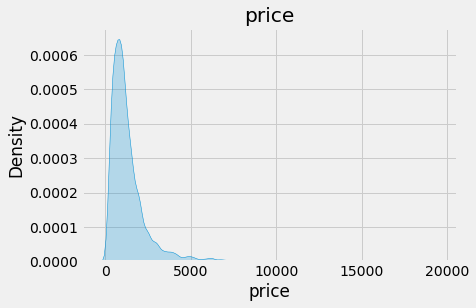

In [83]:
sns.kdeplot(df_listing_droped['price'], shade=True)
plt.title("price")
plt.show()

The distribution appears to be highly skewed, indicating a departure from a normal distribution. To address this, we can apply a logarithmic transformation to make the distribution closer to normal. Additionally, we can consider removing outliers from the data. We will explore both options: analyzing the data with outliers included, and analyzing the data after removing outliers.

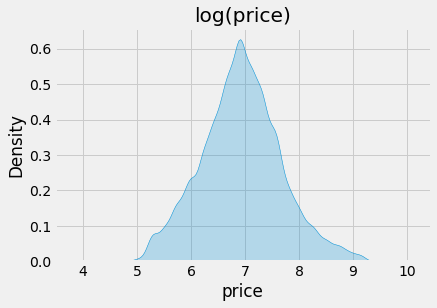

In [84]:
sns.kdeplot(np.log1p(df_listing_droped['price']), shade=True)
plt.title("log(price)")
plt.show();

Upon observing the previous cell, we can see that the distribution of the price variable has become closer to a normal distribution after applying the logarithmic transformation. 

In [85]:
df_listing_droped['price_norm'] = np.log1p(df_listing_droped['price'])
df_listing_droped.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,...,availability_365,number_of_reviews_ltm,Side,Metro,Mall,Night_Life,Museums,Museum_Count,Crime Rate,price_norm
0,25436,105823,Besiktas,41.07883,29.03863,Entire home/apt,2085.0,25,0,0,...,348,0,European,Yes,Yes,Yes,Yes,11.0,High,7.643004
1,27271,117026,Beyoglu,41.03254,28.98153,Entire home/apt,1044.0,10,4,2022-11-01 00:00:00,...,266,1,European,Yes,No,Yes,Yes,21.0,High,6.951772
2,304011,1564870,Beyoglu,41.03537,28.97316,Entire home/apt,1118.0,28,28,2023-03-18 00:00:00,...,240,7,European,Yes,No,Yes,Yes,21.0,High,7.020191
3,304029,1564916,Sisli,41.05156,28.99052,Private room,384.0,2,36,2023-01-05 00:00:00,...,94,1,European,Yes,Yes,Yes,Yes,3.0,High,5.953243
4,28277,121607,Sisli,41.04672,28.98402,Entire home/apt,1857.0,10,8,2022-11-26 00:00:00,...,361,6,European,Yes,Yes,Yes,Yes,3.0,High,7.527256


In [86]:
df_outlier = df_listing_droped 
df_noutlier = df_listing_droped[(df_listing_droped['price_norm'] < 9) & (df_listing_droped['price_norm'] > 5)]

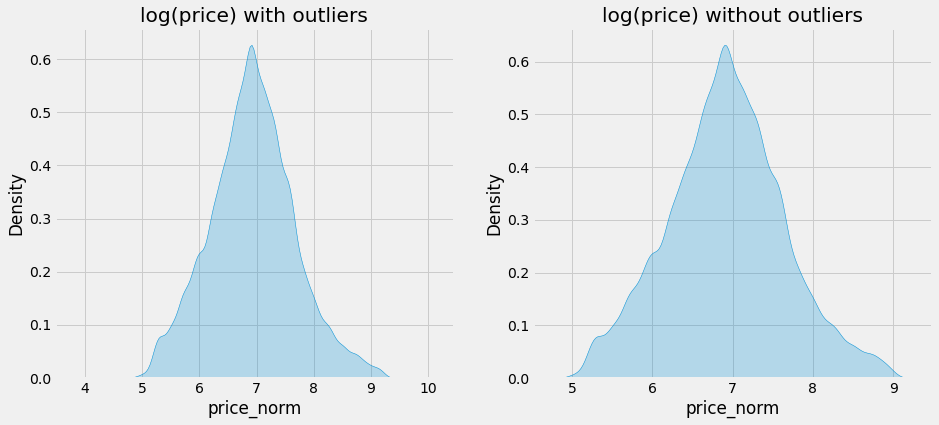

In [91]:
fig, ax = plt.subplots(1,2, figsize=(14,6))

sns.kdeplot(df_outlier['price_norm'], ax=ax[0], shade = True)
ax[0].set(title='log(price) with outliers')

sns.kdeplot(df_noutlier['price_norm'], ax=ax[1], shade = True)
ax[1].set(title='log(price) without outliers')

plt.show();

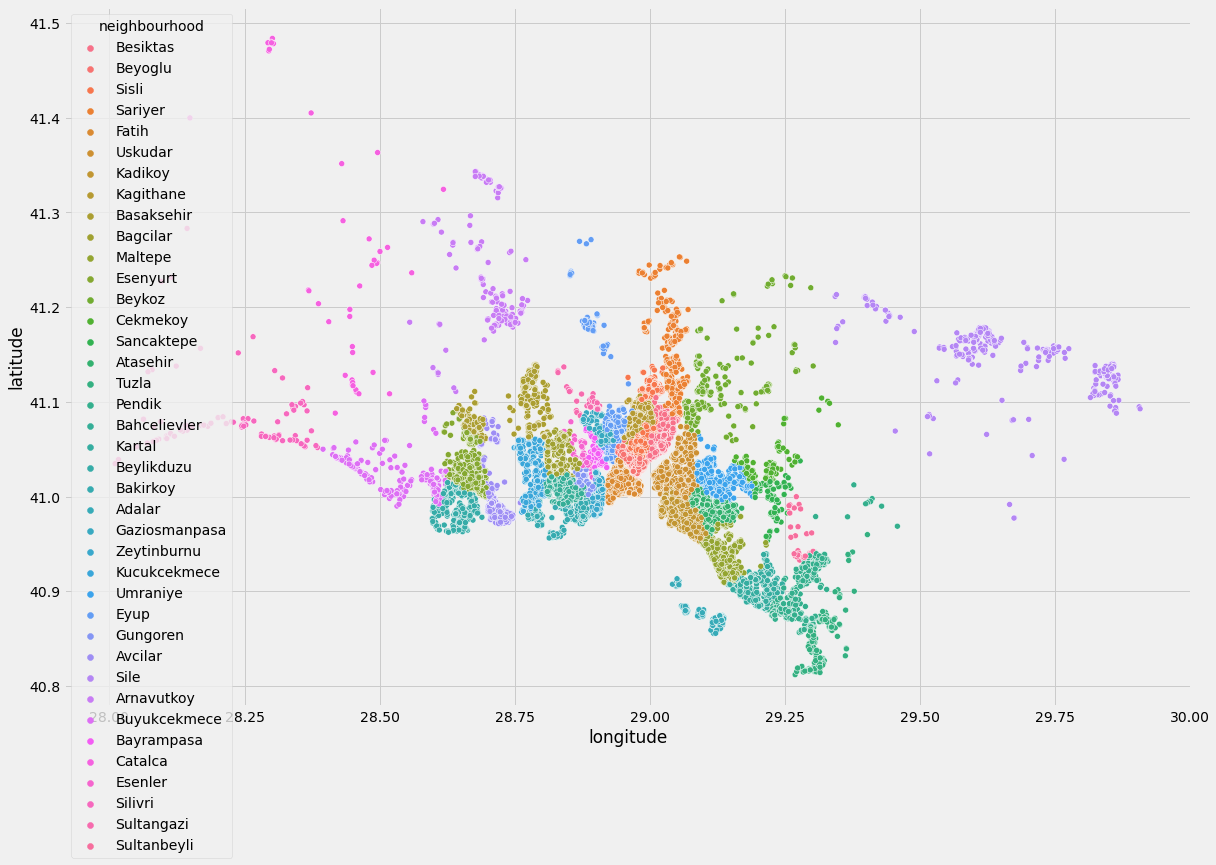

In [111]:
plt.figure(figsize=(18,12))
sns.scatterplot(x= df_listing_droped['longitude'], y=df_listing_droped['latitude'], hue=df_listing_droped['neighbourhood']);

In [69]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [112]:
import folium
from folium import plugins
from folium.plugins import HeatMap

def generateBaseMap(default_location=[ 41, 29], default_zoom_start=10):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

base_map = generateBaseMap()
df_map = df_listing_droped
HeatMap(data=df_map[['latitude', 'longitude', 'price']].groupby(['latitude', 'longitude']).mean().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

base_map

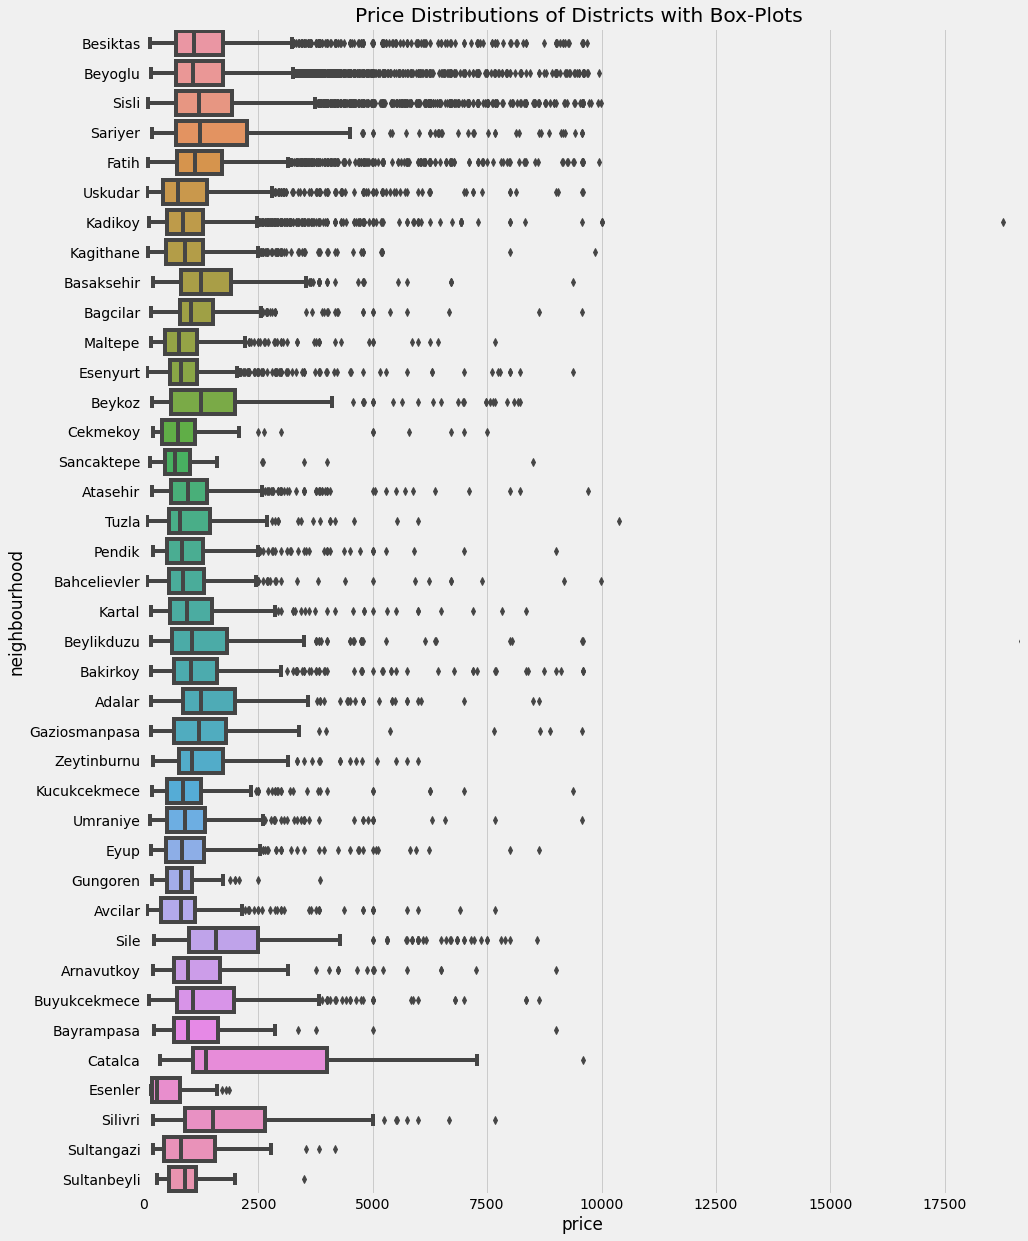

In [80]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,20))
sns.boxplot(y='neighbourhood',x='price',data = df_listing_droped)
plt.title('Price Distributions of Districts with Box-Plots ')
plt.xlim((0,max(df_listing_droped.price)))
plt.show()

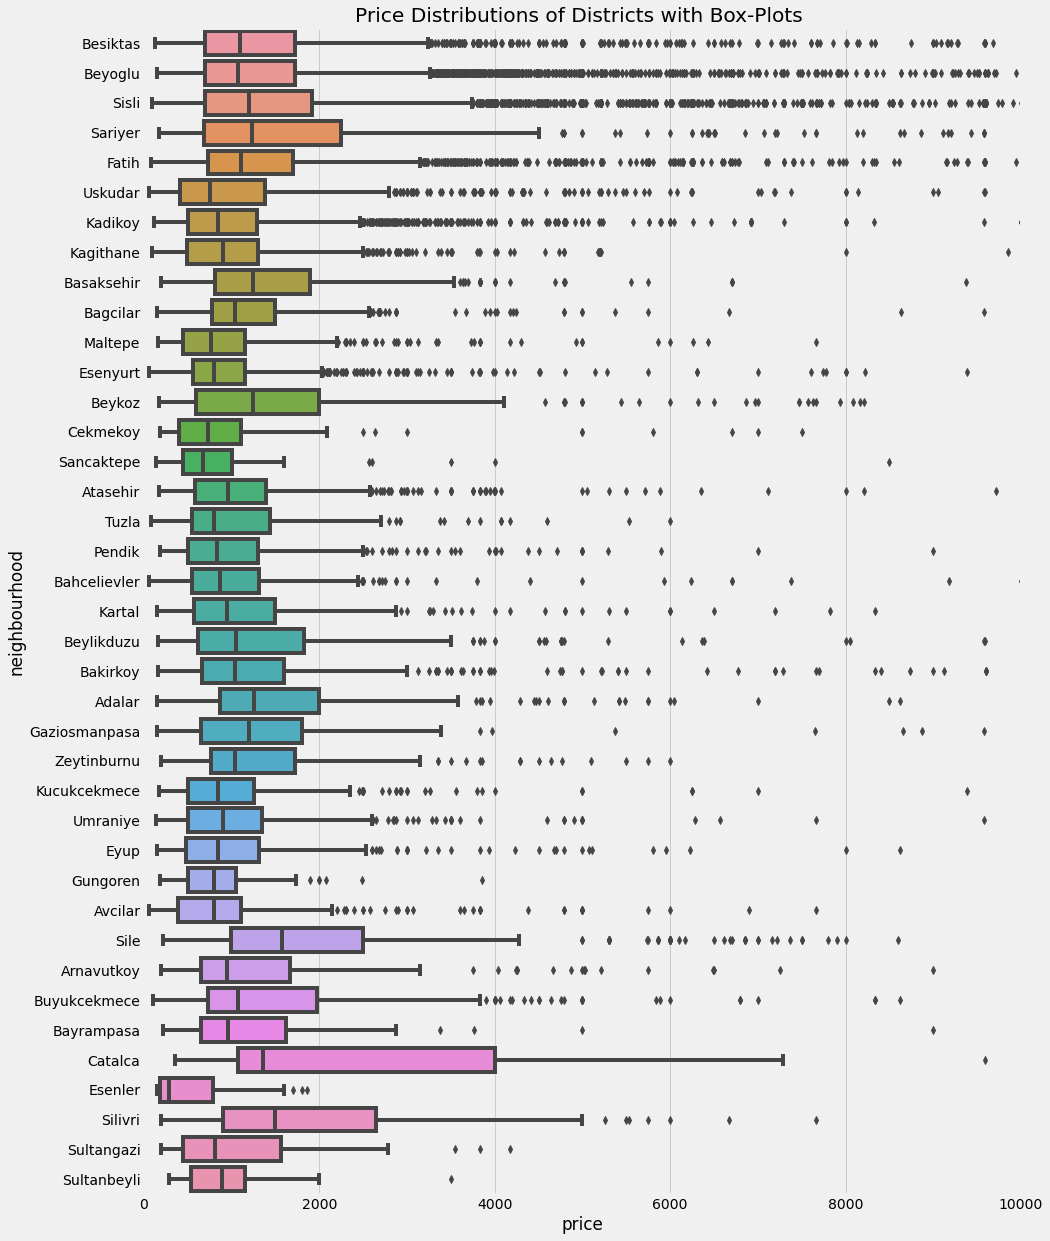

In [81]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,20))
sns.boxplot(y='neighbourhood',x='price',data = df_listing_droped)
plt.title('Price Distributions of Districts with Box-Plots ')
plt.xlim((0,10000))
plt.show()

## Data Analyses and Hypothesis Testing

We think that house/room types may have an impact on prices. We have observed that the price of a shared room will not be the same as the price of the entire house.

H₀: House/room types affect Airbnb prices. <br>
Ha: House/room types do not affect Airbnb prices.

(We take our Significance level as 0.05)

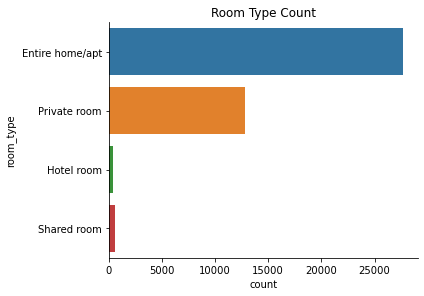

In [77]:
sns.catplot(y = 'room_type', kind = 'count', palette = None, height = 4, aspect = 1.5, data=df_listing_droped);
plt.title("Room Type Count")
plt.show()

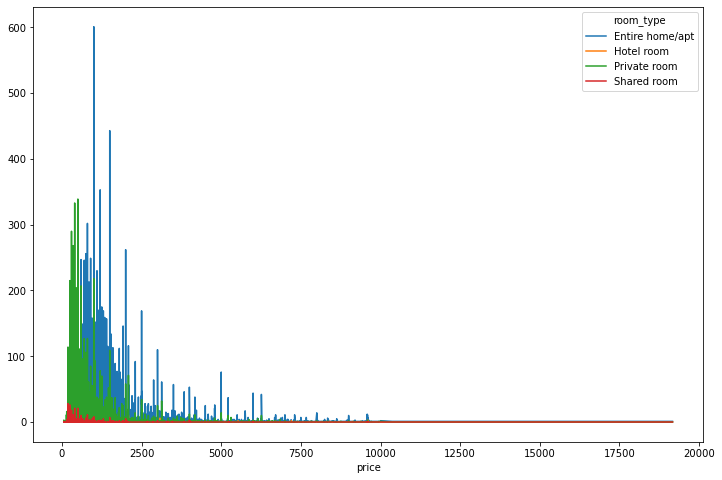

In [208]:
price_room = pd.crosstab(index=[df_listing_droped['price']], columns= df_listing_droped['room_type'])
price_room.plot(figsize=(12,8));

According to the graph, entire home/apt prices are higher than other types. 

In [97]:
from scipy import stats

alpha = 0.05
samples = []

for room_type in df_listing_droped.room_type.unique():
    sample = df_listing_droped[df_listing_droped['room_type'] == room_type]['price']
    samples.append(sample)

# ANOVA test
f_statistic, p_value = stats.f_oneway(*samples)

print("F-Statistic:", f_statistic, "\nP-Value:", p_value)


if p_value < alpha:
    print("Reject null hypothesis. House/room types do not affect Airbnb prices.")
else:
    print("House/room types affect Airbnb prices")

F-Statistic: 1020.7064291935701 
P-Value: 0.0
Reject null hypothesis. House/room types do not affect Airbnb prices.


Our hypothesis test indicates that our alternative test is true; therefore, we reject the null hypothesis.

-------------------------------------------------------------------------------------------------------------------------------

We think metro may have an impact on prices. We have observed that the price of a palaces with metro facility are more expensive than other.

H₀: The presence of the subway affects the Airbnb prices. <br>
Ha: The presence of the subway does not affect the Airbnb prices..

(We take our Significance level as 0.05)

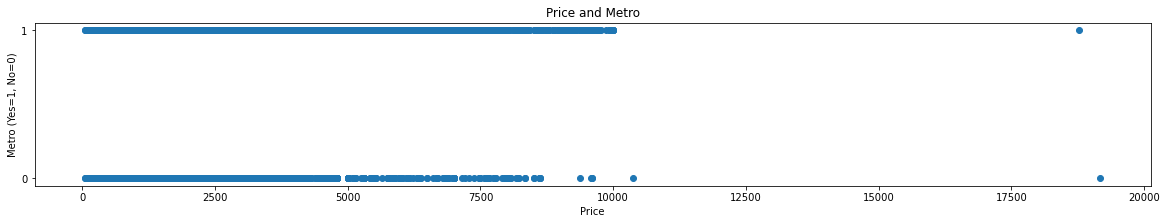

In [230]:
metro_mapping = {'Yes': 1, 'No': 0}
metro_numeric = [metro_mapping[m] for m in df_listing_droped['Metro']]

plt.figure(figsize=(20,3))
plt.scatter(df_listing_droped['price'], metro_numeric)
plt.xlabel('Price')
plt.ylabel('Metro (Yes=1, No=0)')
plt.title('Price and Metro')
plt.yticks([0, 1])
plt.show();

In [98]:
metro_yes = df_listing_droped[df_listing_droped['Metro'] == 'Yes']['price']
metro_no = df_listing_droped[df_listing_droped['Metro'] == 'No']['price']

# t-test
t_statistic, p_value = stats.ttest_ind(metro_yes, metro_no)

print("F-Statistic:", f_statistic, "\nP-Value:", p_value)


if p_value < alpha:
    print("Reject null hypothesis. The presence of the subway does not affect the Airbnb prices.")
else:
    print("The presence of the subway affects the Airbnb prices.")

F-Statistic: 1020.7064291935701 
P-Value: 0.06261095500619905
The presence of the subway affects the Airbnb prices.


Our hypothesis test indicates that our null hypothesis is true; therefore, we accept the null hypothesis.

-------------------------------------------------------------------------------------------------------------------------------

We think night life may have an impact on prices. If we consider that the people who book places on Airbnb may also be local/foreign tourists, we foresee that places with nightclubs and bars will affect Airbnb prices.

H₀: Night life affects the Airbnb prices. <br>
Ha: Night life does not affect the Airbnb prices.

(We take our Significance level as 0.05)

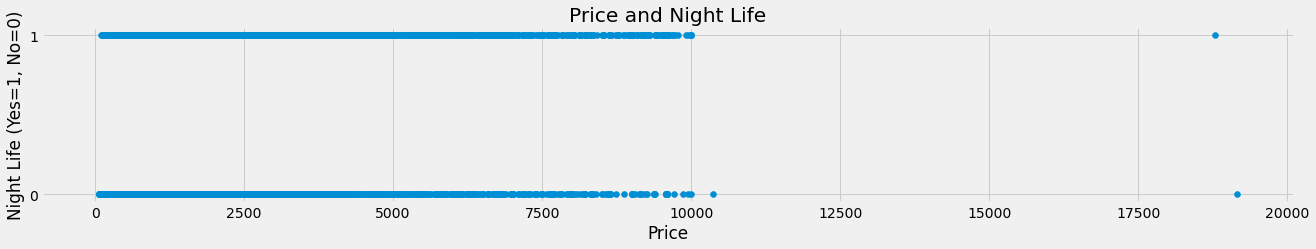

In [101]:
night_mapping = {'Yes': 1, 'No': 0}
night_numeric = [night_mapping[m] for m in df_listing_droped['Night_Life']]

plt.figure(figsize=(20,3))
plt.scatter(df_listing_droped['price'], night_numeric)
plt.xlabel('Price')
plt.ylabel('Night Life (Yes=1, No=0)')
plt.title('Price and Night Life')
plt.yticks([0, 1])
plt.show();

In [102]:
night_yes = df_listing_droped[df_listing_droped['Night_Life'] == 'Yes']['price']
night_no = df_listing_droped[df_listing_droped['Night_Life'] == 'No']['price']

# t-test
t_statistic, p_value = stats.ttest_ind(night_yes, night_no)

print("F-Statistic:", f_statistic, "\nP-Value:", p_value)


if p_value < alpha:
    print("Reject null hypothesis. Night life does not affect the Airbnb prices.")
else:
    print("Night life affects the Airbnb prices.")

F-Statistic: 1020.7064291935701 
P-Value: 1.1501095097210115e-40
Reject null hypothesis. Night life does not affect the Airbnb prices.


-------------------------------------------------------------------------------------------------------------------------------

The fact that there are many museums around shows that it is a historical place and therefore a touristic place. Therefore, we think the number of museums will affect Airbnb prices.

H₀: Museum counts affect the Airbnb prices. <br>
Ha: Museum counts do not affect the Airbnb prices.

(We take our Significance level as 0.05)

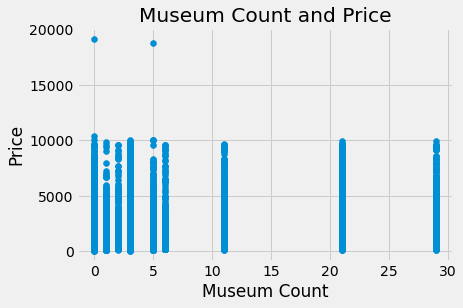

In [103]:
plt.scatter(df_listing_droped['Museum_Count'], df_listing_droped['price'])
plt.xlabel('Museum Count')
plt.ylabel('Price')
plt.title('Museum Count and Price')
plt.show();

In [104]:
corr_coeff, p_value = stats.pearsonr(df_listing_droped['Museum_Count'], df_listing_droped['price'])

print("Correlation coefficient:", corr_coeff)
print("P-Value:", p_value)

if p_value < alpha:
    print("Reject null hypothesis. Museum counts do not affect the Airbnb prices.")
else:
    print("Museum counts affect the Airbnb prices.")

Correlation coefficient: 0.05490300467024188
P-Value: 4.4208185032274963e-29
Reject null hypothesis. Museum counts do not affect the Airbnb prices.


-------------------------------------------------------------------------------------------------------------------------------

The high crime rate in the area indicates that the area is deficient in terms of security and peace. Therefore, we think there is an inverse relationship between crime rate and Airbnb prices.

H₀: Crime rate affects the Airbnb prices. <br>
Ha: Crime rate does not affect the Airbnb prices.

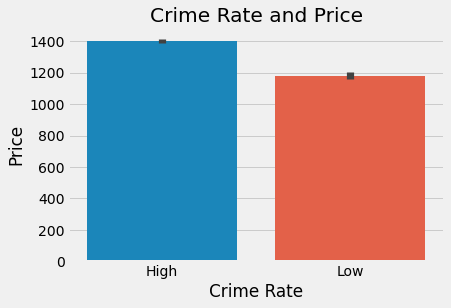

In [108]:
sns.barplot(x='Crime Rate', y='price', data=df_listing_droped)
plt.xlabel('Crime Rate')
plt.ylabel('Price')
plt.title('Crime Rate and Price')
plt.show();

In [109]:
crime_high = df_listing_droped[df_listing_droped['Crime Rate'] == 'High']['price']
crime_low = df_listing_droped[df_listing_droped['Crime Rate'] == 'Low']['price']

# t-test
t_statistic, p_value = stats.ttest_ind(crime_high, crime_low)

print("F-Statistic:", f_statistic, "\nP-Value:", p_value)


if p_value < alpha:
    print("Reject null hypothesis. Crime rate does not affect the Airbnb prices.")
else:
    print("Crime rate affects the Airbnb prices.")

F-Statistic: 1020.7064291935701 
P-Value: 6.799165161631787e-53
Reject null hypothesis. Crime rate does not affect the Airbnb prices.


-------------------------------------------------------------------------------------------------------------------------------

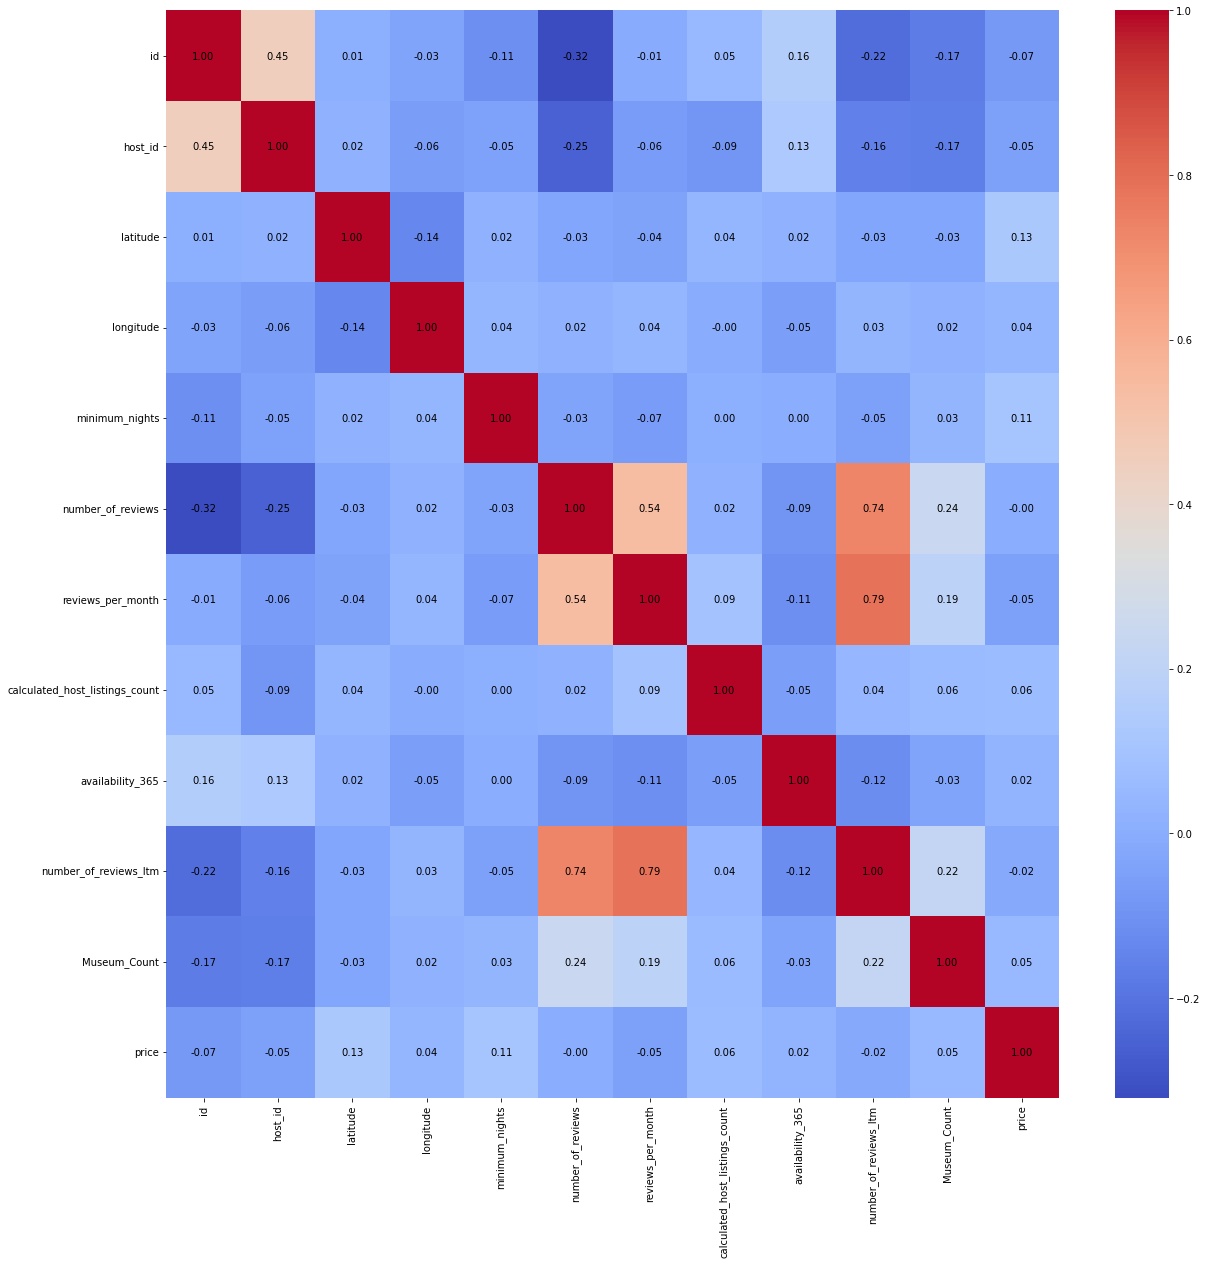

In [190]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df_listing_droped.corr(), annot=True, fmt=".2f", annot_kws={"fontsize": 10, "color": "black"}, cmap='coolwarm')
plt.show();

<b>Considering the our hypothesis testing, it is clearly seen on the heatmap that there is no strong relationship between the price and the others, as we have obtained in the test results. Therefore, the results of the hypothesis tests we have done show that there is no correlation with the prices.

-------------------------------------------------------------------------------------------------------------------------------

## Machine Learning

In [132]:
df_ml = df_listing_droped

In [133]:
drop_columns = ['id', 'host_id', 'neighbourhood', 'latitude', 'longitude',
                'calculated_host_listings_count', 'last_review', 'reviews_per_month',
               'availability_365', 'number_of_reviews_ltm'] # these columns unnecessary for ML
df_ml = df_ml.drop(columns=drop_columns)

In [134]:
df_ml = pd.get_dummies(df_ml)

In [135]:
df_ml.head()

,price,minimum_nights,number_of_reviews,Museum_Count,price_norm,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,Side_Asian,...,Metro_No,Metro_Yes,Mall_No,Mall_Yes,Night_Life_No,Night_Life_Yes,Museums_No,Museums_Yes,Crime Rate_High,Crime Rate_Low
0,2085.0,25,0,11.0,7.643004,1,0,0,0,0,...,0,1,0,1,0,1,0,1,1,0
1,1044.0,10,4,21.0,6.951772,1,0,0,0,0,...,0,1,1,0,0,1,0,1,1,0
2,1118.0,28,28,21.0,7.020191,1,0,0,0,0,...,0,1,1,0,0,1,0,1,1,0
3,384.0,2,36,3.0,5.953243,0,0,1,0,0,...,0,1,0,1,0,1,0,1,1,0
4,1857.0,10,8,3.0,7.527256,1,0,0,0,0,...,0,1,0,1,0,1,0,1,1,0


In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [136]:
X = df_ml.drop('price', axis=1)
y = df_ml['price']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
# Linear Regression
linear = LinearRegression()

linear.fit(X_train, y_train)
linear_predict = linear.predict(X_test)

linear_mse = mean_squared_error(y_test, linear_predict)
linear_r2 = r2_score(y_test, linear_predict)

print("Linear Regression: \nMean Squared Error:", linear_mse, "\nR^2 Score:", linear_r2)

Linear Regression: 
Mean Squared Error: 378843.70026628656 
R^2 Score: 0.7589456919763592


The R-squared (R^2) score of approximately 75.89% of the variance in the target variable can be explained by the independent variables in the Linear Regression model. These metrics indicate that the Linear Regression model is performing well, with accurate predictions and a moderate level of predictive power. 

In [139]:
# Decision Tree Regression
dtree = DecisionTreeRegressor()

dtree.fit(X_train, y_train)
dtree_predict = dtree.predict(X_test)

dtree_mse = mean_squared_error(y_test, dtree_predict)
dtree_r2 = r2_score(y_test, dtree_predict)


print("Decision Tree Regression: \nMean Squared Error:", dtree_mse, "\nR^2 Score:", dtree_r2)

Decision Tree Regression: 
Mean Squared Error: 92.50560173473076 
R^2 Score: 0.9999411396473036


These results suggest that the Decision Tree Regression model is performing extremely well, with a very low Mean Squared Error and a near-perfect R-squared score. However, such a high R^2 score may indicate overfitting, meaning that the model may have memorized the training data and may not generalize well to unseen data. (we might use regularization)

In [141]:
# Random Forest Regression
rf = RandomForestRegressor()

rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predict)
rf_r2 = r2_score(y_test, rf_predict)

print("Random Forest Regression: \nMean Squared Error:", rf_mse, "\nR^2 Score:", rf_r2)

Random Forest Regression: 
Mean Squared Error: 1761.666537200338 
R^2 Score: 0.9988790698966493


Considering the metrics provided, the Decision Tree is the best choice because it has the lowest MSE and the highest R^2 score. But we need to make Cross-Validation in case of overfitting.

In [142]:
from sklearn.model_selection import KFold, cross_val_score

In [144]:
#Cross Validation
cross_val = KFold(n_splits=5, shuffle=True, random_state=42)


dtree_cv = DecisionTreeRegressor()

dt_mse_cv = cross_val_score(dtree_cv, X, y, scoring='neg_mean_squared_error', cv=cross_val)
dt_r2_cv = cross_val_score(dtree_cv, X, y, scoring='r2', cv=cross_val)

dt_mse_cv = -dt_mse_cv # converting to positive

for fold in range(5):
    print(f"Fold {fold+1} - MSE: {dt_mse_cv[fold]}, R^2 Score: {dt_r2_cv[fold]}")

print(f"\nAverage MSE: {dt_mse_cv.mean()}, Average R^2 Score: {dt_r2_cv.mean()}")

Fold 1 - MSE: 21.262859896398023, R^2 Score: 0.999954699951481
Fold 2 - MSE: 25.020361445783134, R^2 Score: 0.9999873367125485
Fold 3 - MSE: 3.303253012048193, R^2 Score: 0.9999975741519249
Fold 4 - MSE: 5.706024096385542, R^2 Score: 0.9999953628885038
Fold 5 - MSE: 21.345180722891566, R^2 Score: 0.9999860648531654

Average MSE: 15.32753583470129, Average R^2 Score: 0.9999842077115249


Since Avg MSE is low it indicates that the model predicts correctly. Also, Avg R^2 Score indicates a high level of predictive power.

In [151]:
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': dtree_predict})

result_df.head(10)

,Actual,Predicted
25627,1440.0,1440.0
24943,1260.0,1260.0
4047,672.0,672.0
18126,1878.0,1878.0
3548,334.0,334.0
323,1044.0,1044.0
14145,220.0,220.0
28536,1600.0,1600.0
26802,1950.0,1950.0
14275,1631.0,1631.0


In [152]:
result_df.tail(10)

,Actual,Predicted
18308,4040.0,4045.0
32669,1390.0,1390.0
27108,841.0,841.0
6778,2713.0,2713.0
7285,1171.0,1171.0
25002,750.0,750.0
19316,2678.0,2680.0
1815,700.0,700.0
21928,890.0,890.0
139,2296.0,2296.0


In [149]:
result_df[result_df["Actual"]!=result_df["Predicted"]].head(20)

,Actual,Predicted
5354,2052.0,2053.0
29515,1156.0,1155.0
9779,5643.0,5653.0
39858,1491.0,1492.0
39637,5652.0,5635.0
41332,1998.0,1999.0
39606,303.0,302.0
2088,2170.0,2171.0
16330,3508.0,3507.0
20930,19166.0,18782.0


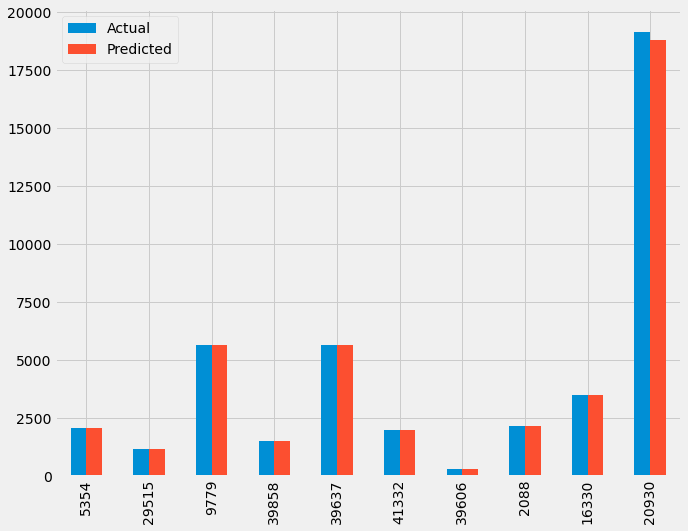

In [168]:
result_df2 = result_df[result_df["Actual"]!=result_df["Predicted"]].head(10)

result_df2.plot(kind='bar',figsize=(10,8))
plt.show();

## Conclusion

<b>With the Decision tree regression model, we got a low MSE and an R^2 close to 1. When we consider the tables and barplot we created for the prediction and actual values, we can conclude that it is quite close.

-------------------------------------------------------------------------------------------------------------------------------